<a href="https://colab.research.google.com/github/lazy-bro/Boom_Models/blob/main/Spam%20Detection%20using%20Multinomial%20Naive%20Bayes/Email_Spam_Detection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd

In [109]:
df = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [110]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [111]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [113]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [114]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
label_df = df['v1'].value_counts().index
values_df = df['v1'].value_counts().values

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

In [118]:
vectorizer = CountVectorizer()

In [119]:
x = vectorizer.fit_transform(df['v2'])

In [120]:
x.shape

(5572, 8672)

In [121]:
from imblearn.over_sampling import SMOTE

In [122]:
sm = SMOTE(random_state=42)

In [123]:
y = df['v1']
X_res, Y_res = sm.fit_resample(x, y)

In [124]:
X_res

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 180975 stored elements and shape (9650, 8672)>

In [125]:
Y_res

,v1
0,ham
1,ham
2,spam
3,ham
4,ham
...,...
9645,spam
9646,spam
9647,spam
9648,spam


In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [127]:
Y_res=le.fit_transform(Y_res)

In [128]:
Y_res

array([0, 0, 1, ..., 1, 1, 1])

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.33, random_state=42)

In [130]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB()

In [131]:
y_test = clf.predict(X_test)

In [132]:
y_test

array([0, 0, 0, ..., 1, 0, 1])

In [133]:
print(clf.score(X_train,Y_train))
print(clf.score(X_test,y_test))

0.9767981438515081
1.0


In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_test)

0.9682888540031397

In [135]:
from sklearn.metrics import confusion_matrix

In [136]:
cm = confusion_matrix(Y_test , y_test)

<Axes: >

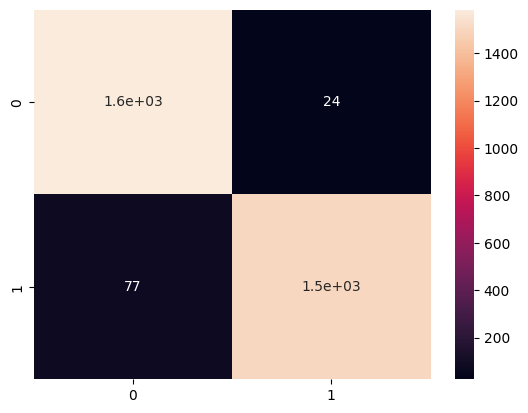

In [137]:
sns.heatmap(cm, annot=True)

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = clf.predict_proba(X_test)[:, 1]

In [139]:
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
auc_score = roc_auc_score(Y_test, y_probs)

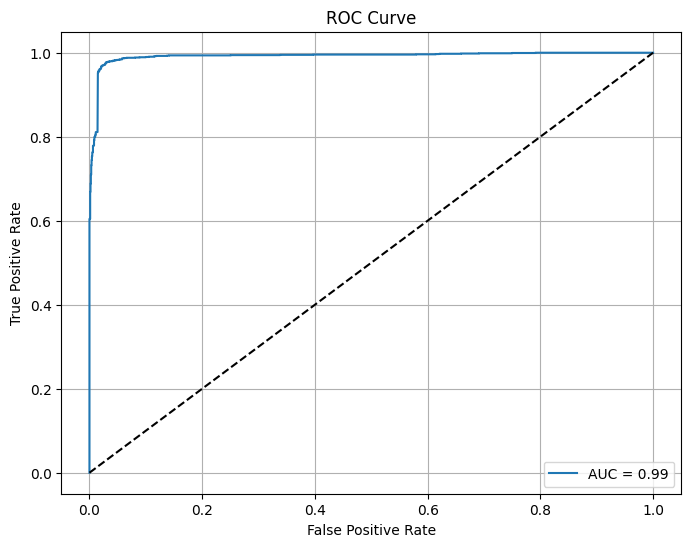

In [148]:
# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [151]:
from sklearn.metrics import classification_report

print("Naive Bayes:")
print(classification_report(y_test, Y_test))

Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1661
           1       0.95      0.98      0.97      1524

    accuracy                           0.97      3185
   macro avg       0.97      0.97      0.97      3185
weighted avg       0.97      0.97      0.97      3185

